# EDA

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Load datasets and explore***

In [72]:
loans_test = pd.read_csv("./data/raw_data/loans_test.csv")
loans_train = pd.read_csv("./data/raw_data/loans_train.csv")
loans_valid = pd.read_csv("./data/raw_data/loans_valid.csv")

In [73]:
# check data columns
# Correct dataset mapping
cols_train = set(loans_train.columns)  # Training set
cols_valid = set(loans_valid.columns)  # Validation set
cols_test  = set(loans_test.columns)   # Test set

common_cols = cols_train & cols_valid & cols_test
only_train  = cols_train - common_cols
only_valid  = cols_valid - common_cols
only_test   = cols_test  - common_cols
uncommon    = (cols_train | cols_valid | cols_test) - common_cols

print("Number of common columns:", len(common_cols))
print("Common columns example:", sorted(list(common_cols))[:10], "...")
print("\nColumns only in train:", sorted(list(only_train)))
print("Columns only in valid:", sorted(list(only_valid)))
print("Columns only in test:", sorted(list(only_test)))
print("\nAll uncommon columns:", sorted(list(uncommon)))


Number of common columns: 143
Common columns example: ['0_CurrentActualUPB', '0_CurrentInterestRate', '0_CurrentNonInterestBearingUPB', '0_EstimatedLTV', '0_InterestBearingUPB', '0_LoanAge', '0_MonthlyReportingPeriod', '0_RemainingMonthsToLegalMaturity', '10_CurrentActualUPB', '10_CurrentInterestRate'] ...

Columns only in train: ['index', 'target']
Columns only in valid: ['index', 'target']
Columns only in test: ['Id']

All uncommon columns: ['Id', 'index', 'target']


- train set(target=0)
- valid,test set(target=0,1)

In [74]:
loans_train.describe()

,index,target,CreditScore,FirstPaymentDate,MaturityDate,MSA,MI_Pct,NumberOfUnits,OriginalCLTV,OriginalDTI,...,12_MonthlyReportingPeriod,12_RemainingMonthsToLegalMaturity,13_CurrentActualUPB,13_CurrentInterestRate,13_CurrentNonInterestBearingUPB,13_EstimatedLTV,13_InterestBearingUPB,13_LoanAge,13_MonthlyReportingPeriod,13_RemainingMonthsToLegalMaturity
count,30504.000000,30504.0,30504.000000,30504.000000,30504.000000,27082.000000,30504.000000,30504.000000,30504.000000,30504.000000,...,30504.0,30504.000000,3.050400e+04,30504.000000,30504.0,30504.000000,3.050400e+04,30504.000000,30504.0,30504.000000
mean,24704.463808,0.0,753.556189,202402.990362,205311.436074,29470.207592,9.712005,1.030094,75.425125,37.833104,...,202502.0,337.124803,3.024334e+05,6.720708,0.0,129.553731,3.024334e+05,13.009605,202503.0,336.124803
std,14263.933226,0.0,156.046939,0.097701,353.664552,11107.002689,13.219152,0.221339,19.579456,10.821587,...,0.0,42.438443,1.785464e+05,0.551169,0.0,233.278471,1.785464e+05,0.097536,0.0,42.438443
min,0.000000,0.0,600.000000,202402.000000,203103.000000,10180.000000,0.000000,1.000000,6.000000,2.000000,...,202502.0,73.000000,0.000000e+00,2.500000,0.0,1.000000,0.000000e+00,13.000000,202503.0,72.000000
25%,12386.750000,0.0,723.000000,202403.000000,205402.000000,19124.000000,0.000000,1.000000,66.000000,32.000000,...,202502.0,348.000000,1.710751e+05,6.375000,0.0,59.000000,1.710751e+05,13.000000,202503.0,347.000000
50%,24762.500000,0.0,760.000000,202403.000000,205402.000000,29820.000000,0.000000,1.000000,80.000000,40.000000,...,202502.0,348.000000,2.653296e+05,6.625000,0.0,73.000000,2.653296e+05,13.000000,202503.0,347.000000
75%,37083.500000,0.0,786.000000,202403.000000,205402.000000,38860.000000,25.000000,1.000000,90.000000,45.000000,...,202502.0,348.000000,3.967082e+05,7.000000,0.0,85.000000,3.967082e+05,13.000000,202503.0,347.000000
max,49299.000000,0.0,9999.000000,202403.000000,205402.000000,49740.000000,35.000000,4.000000,105.000000,999.000000,...,202502.0,348.000000,1.677850e+06,9.125000,0.0,999.000000,1.677850e+06,14.000000,202503.0,347.000000


***Data type check***

In [75]:
# Convert date columns to datetime format

# Convert FirstPaymentDate and MaturityDate
for col in ['FirstPaymentDate', 'MaturityDate']:
    if col in loans_train.columns:
        loans_train[col] = pd.to_datetime(loans_train[col])
        loans_valid[col] = pd.to_datetime(loans_valid[col])
        loans_test[col] = pd.to_datetime(loans_test[col])

# Convert MonthlyReportingPeriod columns (YYYYMM format)
monthly_cols = [col for col in loans_train.columns if 'MonthlyReportingPeriod' in col]
for col in monthly_cols:
    # Convert YYYYMM format to datetime
    loans_train[col] = pd.to_datetime(loans_train[col], format='%Y%m')
    loans_valid[col] = pd.to_datetime(loans_valid[col], format='%Y%m')
    loans_test[col] = pd.to_datetime(loans_test[col], format='%Y%m')

print('converted columns: FirstPaymentDate, MaturityDate, MonthlyReportingPeriod')

converted columns: FirstPaymentDate, MaturityDate, MonthlyReportingPeriod


***Drop columns with 100% missing data***

In [76]:
# Comprehensive analysis of data vacancy

# 1. Overall missing data summary
missing_summary = loans_train.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_summary / len(loans_train)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_summary,
    'Missing_Percentage': missing_pct
})

print(f"Total features: {len(loans_train.columns)}")
print(f"Features with missing data: {(missing_summary > 0).sum()}")
print(f"Features with complete data: {(missing_summary == 0).sum()}")

# Show top 20 features with most missing data
print("Top 20 features with most missing data:")
print(missing_df.head(20).to_string())

# 2. Missing data patterns by feature type
# Categorize features
static_features = [col for col in loans_train.columns if not col.startswith(('0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_')) and col not in ['index', 'target']]
time_series_features = [col for col in loans_train.columns if col.startswith(('0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_'))]

print(f"Static features: {len(static_features)}")
print(f"Time series features: {len(time_series_features)}")
print()

# Analyze missing data by feature type
static_missing = loans_train[static_features].isnull().sum()
time_series_missing = loans_train[time_series_features].isnull().sum()

print("Static features missing data summary:")
print(f"  Features with missing data: {(static_missing > 0).sum()}")
print(f"  Average missing percentage: {static_missing.mean() / len(loans_train) * 100:.2f}%")

print("Time series features missing data summary:")
print(f"  Features with missing data: {(time_series_missing > 0).sum()}")
print(f"  Average missing percentage: {time_series_missing.mean() / len(loans_train) * 100:.2f}%")

Total features: 145
Features with missing data: 4
Features with complete data: 141
Top 20 features with most missing data:
                          Missing_Count  Missing_Percentage
ReliefRefinanceIndicator          30504          100.000000
PreHARP_Flag                      30504          100.000000
SuperConformingFlag               30176           98.924731
MSA                                3422           11.218201
index                                 0            0.000000
FirstTimeHomebuyerFlag                0            0.000000
target                                0            0.000000
FirstPaymentDate                      0            0.000000
CreditScore                           0            0.000000
OccupancyStatus                       0            0.000000
OriginalCLTV                          0            0.000000
OriginalDTI                           0            0.000000
OriginalUPB                           0            0.000000
OriginalLTV                          

In [77]:
# Drop columns with 100% missing data directly
columns_to_drop = ['ReliefRefinanceIndicator', 'PreHARP_Flag']

# Drop columns directly from original datasets
loans_train.drop(columns=columns_to_drop, inplace=True)
loans_valid.drop(columns=columns_to_drop, inplace=True)
loans_test.drop(columns=columns_to_drop, inplace=True)

***process missing data(999)***

CreditScore: Values outside range or missing coded as 9999.

MI_Pct: 999 = not available.

OriginalDTI: Values > 65% or missing coded as 999.

OriginalLTV: Invalid coded as 999.

N_EstimatedLTV: Range 1–998, with 999 = unknown.

In [78]:
import numpy as np
import pandas as pd

def process_missing_999_fill_mean(df):
    """
    Replace coded missing values (999/9999) with NaN,
    then fill NaN with column mean.
    """
    # Columns with coded missing values
    static_cols = ['CreditScore', 'MI_Pct', 'OriginalDTI', 'OriginalLTV']

    # Replace coded values with NaN
    if 'CreditScore' in df.columns:
        df['CreditScore'] = df['CreditScore'].replace({999: np.nan, 9999: np.nan})
    for col in ['MI_Pct', 'OriginalDTI', 'OriginalLTV']:
        if col in df.columns:
            df[col] = df[col].replace(999, np.nan)

    # Time-series columns that contain EstimatedLTV
    time_cols = [c for c in df.columns if 'EstimatedLTV' in c]
    for c in time_cols:
        df[c] = df[c].replace(999, np.nan)

    # Fill numeric NaNs with column mean
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].mean())

    return df

# Apply to all datasets
loans_train = process_missing_999_fill_mean(loans_train)
loans_valid = process_missing_999_fill_mean(loans_valid)
loans_test  = process_missing_999_fill_mean(loans_test)

print("✅ Filled all coded/missing numeric values with column means.")


✅ Filled all coded/missing numeric values with column means.


***Distribution Analysis***

- Total columns: 143
- Non-object type columns: 128
- Columns dropped from analysis: ['index']
- Object type columns (excluded): 15
3. Data Range Analysis for Numerical Columns:
- target:
  Range: [0.00, 0.00]
  Mean: 0.00, Std: 0.00
- CreditScore:
  Range: [600.00, 830.00]
  Mean: 751.13, Std: 43.89
- MSA:
  Range: [10180.00, 49740.00]
  Mean: 29470.21, Std: 10465.45
- MI_Pct:
  Range: [0.00, 35.00]
  Mean: 9.71, Std: 13.22
- NumberOfUnits:
  Range: [1.00, 4.00]
  Mean: 1.03, Std: 0.22
- OriginalCLTV:
  Range: [6.00, 105.00]
  Mean: 75.43, Std: 19.58
- OriginalDTI:
  Range: [2.00, 50.00]
  Mean: 37.80, Std: 9.32
- OriginalUPB:
  Range: [15000.00, 1700000.00]
  Mean: 317095.43, Std: 181297.52
- OriginalLTV:
  Range: [6.00, 97.00]
  Mean: 75.19, Std: 19.43
- OriginalInterestRate:
  Range: [2.50, 9.12]
  Mean: 6.72, Std: 0.55
- PostalCode:
  Range: [800.00, 99800.00]
  Mean: 50782.74, Std: 28160.54
- OriginalLoanTerm:
  Range: [85.00, 360.00]
  Mean: 349.13, Std: 42.44
- NumberOfBorrower

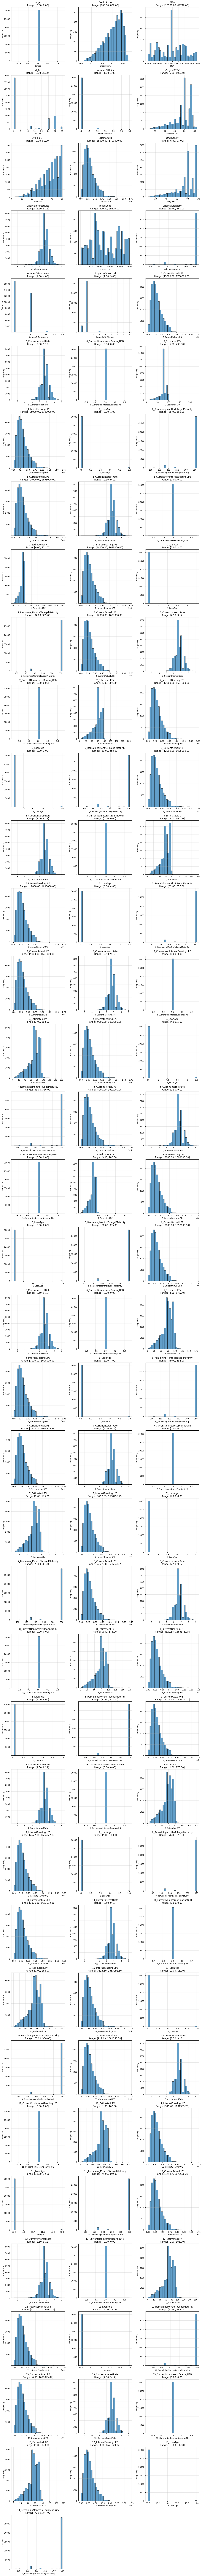

5. Summary Statistics:
- Total non-object columns analyzed: 128
- Numerical columns: 112

Basic Statistics for Numerical Columns:
        target  CreditScore       MSA    MI_Pct  NumberOfUnits  OriginalCLTV  \
count  30504.0     30504.00  30504.00  30504.00       30504.00      30504.00   
mean       0.0       751.13  29470.21      9.71           1.03         75.43   
std        0.0        43.89  10465.45     13.22           0.22         19.58   
min        0.0       600.00  10180.00      0.00           1.00          6.00   
25%        0.0       723.00  19740.00      0.00           1.00         66.00   
50%        0.0       760.00  29470.21      0.00           1.00         80.00   
75%        0.0       786.00  38060.00     25.00           1.00         90.00   
max        0.0       830.00  49740.00     35.00           4.00        105.00   

       OriginalDTI  OriginalUPB  OriginalLTV  OriginalInterestRate  ...  \
count     30504.00     30504.00     30504.00              30504.00  ...   

In [79]:
# Distribution Analysis - Non-Object Type Columns

columns_to_drop = ['index']  # Add columns to exclude from analysis

# Get all columns
all_cols = loans_train.columns.tolist()

# Select only non-object type columns (numerical, datetime, etc.)
non_object_cols = loans_train.select_dtypes(exclude=['object']).columns.tolist()

# Remove columns in the drop list
non_object_cols = [col for col in non_object_cols if col not in columns_to_drop]

print(f"- Total columns: {len(all_cols)}")
print(f"- Non-object type columns: {len(non_object_cols)}")
print(f"- Columns dropped from analysis: {columns_to_drop}")
print(f"- Object type columns (excluded): {len(all_cols) - len(non_object_cols)}")

# Group by data type
data_types = {}
for col in non_object_cols:
    dtype = str(loans_train[col].dtype)
    if dtype not in data_types:
        data_types[dtype] = []
    data_types[dtype].append(col)


# 3. Data range analysis for numerical columns
numerical_cols = loans_train[non_object_cols].select_dtypes(include=[np.number]).columns.tolist()
if len(numerical_cols) > 0:
    print("3. Data Range Analysis for Numerical Columns:")
    numerical_stats = loans_train[numerical_cols].describe()
    
    for col in numerical_cols:
        min_val = numerical_stats.loc['min', col]
        max_val = numerical_stats.loc['max', col]
        mean_val = numerical_stats.loc['mean', col]
        std_val = numerical_stats.loc['std', col]
        
        print(f"- {col}:")
        print(f"  Range: [{min_val:.2f}, {max_val:.2f}]")
        print(f"  Mean: {mean_val:.2f}, Std: {std_val:.2f}")
    print()

# 4. Distribution histograms for numerical columns
if len(numerical_cols) > 0:
    print("4. Distribution Histograms for Numerical Columns:")
    
    # Calculate subplot layout
    n_cols = len(numerical_cols)
    n_rows = (n_cols + 2) // 3  # 3 columns per row
    
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(numerical_cols):
        row = i // 3
        col_idx = i % 3
        
        # Create histogram
        axes[row, col_idx].hist(loans_train[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        axes[row, col_idx].set_title(f'{col}\nRange: [{loans_train[col].min():.2f}, {loans_train[col].max():.2f}]')
        axes[row, col_idx].set_xlabel(col)
        axes[row, col_idx].set_ylabel('Frequency')
        axes[row, col_idx].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for i in range(n_cols, n_rows * 3):
        row = i // 3
        col_idx = i % 3
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found.")

# 5. Summary statistics
print("5. Summary Statistics:")
print(f"- Total non-object columns analyzed: {len(non_object_cols)}")
print(f"- Numerical columns: {len(numerical_cols)}")

# Show basic statistics for numerical columns
if len(numerical_cols) > 0:
    print("\nBasic Statistics for Numerical Columns:")
    print(loans_train[numerical_cols].describe().round(2))
else:
    print("- No numerical columns found for analysis.")

In [80]:
# Output loans_train static columns and panel columns
print("=== loans_train Column Structure Analysis ===")
print(f"Total columns: {len(loans_train.columns)}")

# Static features (non-time series features)
static_features = [col for col in loans_train.columns 
                   if not col.startswith(('0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_')) 
                   and col not in ['index', 'target']]

# Time series features (panel features)
panel_features = [col for col in loans_train.columns 
                  if col.startswith(('0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_'))]

# Special columns
special_cols = ['index', 'target']

print("1. Static Features:")
print(f"   Count: {len(static_features)}")
print("   Column names:")
for i, col in enumerate(sorted(static_features), 1):
    print(f"   {i:2d}. {col}")


print("2. Time Series Features (Panel Features):")
print(f"   Count: {len(panel_features)}")
print("   Grouped by time points:")
panel_dict = {}
for col in sorted(panel_features):
    time_point = col.split('_')[0]
    if time_point not in panel_dict:
        panel_dict[time_point] = []
    panel_dict[time_point].append(col)

for time_point in sorted(panel_dict.keys(), key=lambda x: int(x)):
    print(f"   Time point {time_point}:")
    for col in sorted(panel_dict[time_point]):
        feature_name = col.split('_', 1)[1]  # Get feature name
        print(f"     - {feature_name}")

print("3. Special Columns:")
print(f"   Count: {len(special_cols)}")
for i, col in enumerate(special_cols, 1):
    print(f"   {i}. {col}")

print("4. Summary Statistics:")
print(f"   - Static features: {len(static_features)} columns")
print(f"   - Time series features: {len(panel_features)} columns")
print(f"   - Special columns: {len(special_cols)} columns")
print(f"   - Total: {len(static_features) + len(panel_features) + len(special_cols)} columns")
print(f"   - Time points: {len(panel_dict)} (0-{max([int(k) for k in panel_dict.keys()])})")
print(f"   - Features per time point: {len(panel_features) // len(panel_dict)}")


=== loans_train Column Structure Analysis ===
Total columns: 143
1. Static Features:
   Count: 29
   Column names:
    1. BalloonIndicator
    2. Channel
    3. CreditScore
    4. FirstPaymentDate
    5. FirstTimeHomebuyerFlag
    6. InterestOnlyFlag
    7. LoanPurpose
    8. MI_Pct
    9. MSA
   10. MaturityDate
   11. NumberOfBorrowers
   12. NumberOfUnits
   13. OccupancyStatus
   14. OriginalCLTV
   15. OriginalDTI
   16. OriginalInterestRate
   17. OriginalLTV
   18. OriginalLoanTerm
   19. OriginalUPB
   20. PPM_Flag
   21. PostalCode
   22. ProductType
   23. ProgramIndicator
   24. PropertyState
   25. PropertyType
   26. PropertyValMethod
   27. SellerName
   28. ServicerName
   29. SuperConformingFlag
2. Time Series Features (Panel Features):
   Count: 112
   Grouped by time points:
   Time point 0:
     - CurrentActualUPB
     - CurrentInterestRate
     - CurrentNonInterestBearingUPB
     - EstimatedLTV
     - InterestBearingUPB
     - LoanAge
     - MonthlyReportingPeriod
 

# Feature Engineering

***One-hot encode for Object***

In [81]:
# Display all object columns sorted by unique values (ascending)
print("=== All Object Columns (Sorted by Unique Values) ===")
object_cols = loans_train.select_dtypes(include=['object']).columns.tolist()
print(f"Found {len(object_cols)} object columns:")
print()

# Create list of columns with their unique counts for sorting
col_info = []
for col in object_cols:
    unique_count = loans_train[col].nunique()
    col_info.append((col, unique_count))

# Sort by unique values (ascending)
col_info.sort(key=lambda x: x[1])

for i, (col, unique_count) in enumerate(col_info, 1):
    print(f"{i}. {col}")
    print(f"   Data type: {loans_train[col].dtype}")
    print(f"   Unique values: {unique_count}")
    print()

=== All Object Columns (Sorted by Unique Values) ===
Found 14 object columns:

1. PPM_Flag
   Data type: object
   Unique values: 1

2. ProductType
   Data type: object
   Unique values: 1

3. SuperConformingFlag
   Data type: object
   Unique values: 1

4. InterestOnlyFlag
   Data type: object
   Unique values: 1

5. FirstTimeHomebuyerFlag
   Data type: object
   Unique values: 2

6. OccupancyStatus
   Data type: object
   Unique values: 3

7. Channel
   Data type: object
   Unique values: 3

8. LoanPurpose
   Data type: object
   Unique values: 3

9. ProgramIndicator
   Data type: object
   Unique values: 3

10. BalloonIndicator
   Data type: object
   Unique values: 3

11. PropertyType
   Data type: object
   Unique values: 5

12. ServicerName
   Data type: object
   Unique values: 19

13. SellerName
   Data type: object
   Unique values: 20

14. PropertyState
   Data type: object
   Unique values: 54



In [82]:

from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding for categorical columns (sklearn, single-DataFrame API)
class SklearnOHE:
    def __init__(self, categorical_cols):
        self.categorical_cols = list(categorical_cols)
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=np.int8)
        self.feature_names_ = None
        self.existing_cols_ = None
        self.fitted_ = False

    def fit(self, df):
        # Keep only columns that exist in df
        self.existing_cols_ = [c for c in self.categorical_cols if c in df.columns]
        X_cat = df[self.existing_cols_].astype('object')
        self.encoder.fit(X_cat)
        self.feature_names_ = self.encoder.get_feature_names_out(self.existing_cols_)
        self.fitted_ = True
        return self

    def transform(self, df):
        assert self.fitted_, "Encoder is not fitted. Call fit(df) first."
        X_cat = df[self.existing_cols_].astype('object')
        ohe = pd.DataFrame(self.encoder.transform(X_cat), columns=self.feature_names_, index=df.index)
        df_out = df.drop(columns=self.existing_cols_)
        df_out = pd.concat([df_out, ohe], axis=1)
        return df_out

    def fit_transform(self, df):
        return self.fit(df).transform(df)

# Specify columns to encode
one_hot_columns = [
    'PPM_Flag', 'ProductType', 'SuperConformingFlag', 'InterestOnlyFlag', 'FirstTimeHomebuyerFlag', 'OccupancyStatus', 'Channel', 'LoanPurpose', 'ProgramIndicator', 'BalloonIndicator', 'PropertyType'
]

print("=== One-Hot Encoding for Categorical Columns (sklearn) ===")
ohe = SklearnOHE(one_hot_columns)
# Call three times: train (fit), valid (transform), test (transform)
loans_train = ohe.fit_transform(loans_train)
loans_valid = ohe.transform(loans_valid)
loans_test = ohe.transform(loans_test)


=== One-Hot Encoding for Categorical Columns (sklearn) ===


In [83]:
# Analysis of categorical columns: ServicerName, SellerName, PropertyState
# One-Hot + Top-10 One-Hot + Frequency Encoding
# Fixed Top-N encoding using hardcoded categories from training data
def encode_categorical_fixed_hardcoded(train_df, valid_df, test_df):
    """Encode categorical columns using hardcoded Top-N categories."""
    
    # Hardcoded Top 10 categories from training data analysis
    servicer_top10 = [
        'Other servicers',
        'NATIONSTAR MORTGAGE LLC DBA MR. COOPER',
        'AMERIHOME MORTGAGE COMPANY, LLC',
        'UNITED WHOLESALE MORTGAGE, LLC',
        'PENNYMAC LOAN SERVICES, LLC',
        'LAKEVIEW LOAN SERVICING, LLC',
        'ROCKET MORTGAGE, LLC',
        'NEW RESIDENTIAL MORTGAGE LLC',
        'JPMORGAN CHASE BANK, NATIONAL ASSOCIATION',
        'FREEDOM MORTGAGE CORPORATION'
    ]
    
    seller_top10 = [
        'Other sellers',
        'UNITED WHOLESALE MORTGAGE, LLC',
        'AMERIHOME MORTGAGE COMPANY, LLC',
        'ROCKET MORTGAGE, LLC',
        'PENNYMAC LOAN SERVICES, LLC',
        'NEWREZ LLC',
        'JPMORGAN CHASE BANK, NATIONAL ASSOCIATION',
        'U.S. BANK N.A.',
        'PHH MORTGAGE CORPORATION',
        'FAIRWAY INDEPENDENT MORTGAGE CORPORATION'
    ]
    
    state_top10 = [
        'TX', 'FL', 'CA', 'NY', 'IL', 'OH', 'PA', 'MI', 'NC', 'GA'
    ]
    
    # Create copies
    train_encoded = train_df.copy()
    valid_encoded = valid_df.copy()
    test_encoded = test_df.copy()
    
    # Encode ServicerName
    print("Encoding ServicerName...")
    for df in [train_encoded, valid_encoded, test_encoded]:
        # Add frequency column
        train_freq = train_df['ServicerName'].value_counts(normalize=True).to_dict()
        df['ServicerName_freq'] = df['ServicerName'].map(train_freq).fillna(0)
        
        # Create one-hot columns
        for cat in servicer_top10:
            new_col = f"ServicerName_{cat[:15].replace(' ','_')}"
            df[new_col] = (df['ServicerName'] == cat).astype(int)
        
        # Replace non-Top-10 with 'Other'
        df['ServicerName'] = df['ServicerName'].where(df['ServicerName'].isin(servicer_top10), 'Other')
    
    # Encode SellerName
    print("Encoding SellerName...")
    for df in [train_encoded, valid_encoded, test_encoded]:
        # Add frequency column
        train_freq = train_df['SellerName'].value_counts(normalize=True).to_dict()
        df['SellerName_freq'] = df['SellerName'].map(train_freq).fillna(0)
        
        # Create one-hot columns
        for cat in seller_top10:
            new_col = f"SellerName_{cat[:15].replace(' ','_')}"
            df[new_col] = (df['SellerName'] == cat).astype(int)
        
        # Replace non-Top-10 with 'Other'
        df['SellerName'] = df['SellerName'].where(df['SellerName'].isin(seller_top10), 'Other')
    
    # Encode PropertyState
    print("Encoding PropertyState...")
    for df in [train_encoded, valid_encoded, test_encoded]:
        # Add frequency column
        train_freq = train_df['PropertyState'].value_counts(normalize=True).to_dict()
        df['PropertyState_freq'] = df['PropertyState'].map(train_freq).fillna(0)
        
        # Create one-hot columns
        for cat in state_top10:
            new_col = f"PropertyState_{cat}"
            df[new_col] = (df['PropertyState'] == cat).astype(int)
        
        # Replace non-Top-10 with 'Other'
        df['PropertyState'] = df['PropertyState'].where(df['PropertyState'].isin(state_top10), 'Other')
    
    return train_encoded, valid_encoded, test_encoded

# Apply hardcoded encoding
print(f"Before encoding: Train {loans_train.shape}, Valid {loans_valid.shape}, Test {loans_test.shape}")

loans_train, loans_valid, loans_test = encode_categorical_fixed_hardcoded(
    loans_train, loans_valid, loans_test
)

print(f"After encoding: Train {loans_train.shape}, Valid {loans_valid.shape}, Test {loans_test.shape}")


Before encoding: Train (30504, 159), Valid (5370, 159), Test (13426, 158)
Encoding ServicerName...
Encoding SellerName...
Encoding PropertyState...
After encoding: Train (30504, 192), Valid (5370, 192), Test (13426, 191)


***statistical features from panel data***

In [84]:
# Extract statistical features from panel data time series
import numpy as np
from scipy import stats
import pandas as pd

def extract_time_series_features(df, base_variables, time_points=14):
    """
    Extract statistical features from panel data time series.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame with panel data in wide format
    base_variables : list
        List of base variable names (without time prefix)
    time_points : int
        Number of time points (default 14 for 0-13)
    
    Returns:
    --------
    pd.DataFrame
        DataFrame with extracted statistical features
    """
    
    print(f"Extracting time series features for {len(base_variables)} variables...")
    print(f"Base variables: {base_variables}")
    
    # Create a copy to store results
    result_df = df.copy()
    
    for base_var in base_variables:
        print(f"\nProcessing {base_var}...")
        
        # Get all time-series columns for this variable
        time_cols = [f"{t}_{base_var}" for t in range(time_points)]
        existing_cols = [col for col in time_cols if col in df.columns]
        
        if not existing_cols:
            print(f"  Warning: No time-series columns found for {base_var}")
            continue
            
        print(f"  Found {len(existing_cols)} time points")
        
        # Check data type of the first column
        first_col = existing_cols[0]
        col_dtype = df[first_col].dtype
        
        if col_dtype == 'datetime64[ns]' or str(col_dtype).startswith('datetime'):
            print(f"  Skipping {base_var} - datetime columns cannot be used for statistical calculations")
            continue
        
        # Extract data for this variable across all time points
        time_data = df[existing_cols].values  # Shape: (n_samples, n_time_points)
        
        # 1. 平均水平 (Average Level)
        # Mean
        result_df[f"{base_var}_mean"] = np.nanmean(time_data, axis=1)
        # Standard deviation
        result_df[f"{base_var}_std"] = np.nanstd(time_data, axis=1)
        
        # 2. 极值 (Extreme Values)
        # Minimum
        result_df[f"{base_var}_min"] = np.nanmin(time_data, axis=1)
        # Maximum
        result_df[f"{base_var}_max"] = np.nanmax(time_data, axis=1)
        
        # 3. 趋势 (Trend)
        # Linear regression slope
        slopes = []
        first_values = []
        last_values = []
        
        for i in range(len(time_data)):
            row_data = time_data[i]
            valid_mask = ~np.isnan(row_data)
            
            if np.sum(valid_mask) >= 2:  # Need at least 2 points for slope
                valid_data = row_data[valid_mask]
                time_indices = np.arange(len(row_data))[valid_mask]
                
                # Calculate slope using linear regression
                slope, _, _, _, _ = stats.linregress(time_indices, valid_data)
                slopes.append(slope)
                
                # First and last values
                first_values.append(valid_data[0])
                last_values.append(valid_data[-1])
            else:
                slopes.append(np.nan)
                first_values.append(np.nan)
                last_values.append(np.nan)
        
        result_df[f"{base_var}_slope"] = slopes
        result_df[f"{base_var}_first"] = first_values
        result_df[f"{base_var}_last"] = last_values
        
        # 4. 首尾差 (First-Last Difference)
        result_df[f"{base_var}_diff"] = result_df[f"{base_var}_last"] - result_df[f"{base_var}_first"]
        
        # 5. 波动性 (Volatility)
        # Range (max - min)
        result_df[f"{base_var}_range"] = result_df[f"{base_var}_max"] - result_df[f"{base_var}_min"]
        
        print(f"  Added 8 statistical features for {base_var}")
    
    # Show summary of new features
    original_cols = set(df.columns)
    new_cols = set(result_df.columns)
    added_cols = new_cols - original_cols
    
    print(f"\n=== Feature Extraction Summary ===")
    print(f"Original shape: {df.shape}")
    print(f"New shape: {result_df.shape}")
    print(f"Features added: {len(added_cols)}")
    print(f"Expected features: {len(base_variables) * 8}")
    
    return result_df

# Define the 7 panel variables to extract features from (excluding MonthlyReportingPeriod)
panel_variables = [
    'CurrentActualUPB',
    'CurrentInterestRate', 
    'CurrentNonInterestBearingUPB',
    'EstimatedLTV',
    'InterestBearingUPB',
    'LoanAge',
    'RemainingMonthsToLegalMaturity'
]

print("=== Extracting Time Series Features ===")
print(f"Panel variables: {panel_variables}")
print(f"Note: MonthlyReportingPeriod skipped (datetime type)")
print(f"Expected features per variable: 8")
print(f"Total expected new features: {len(panel_variables) * 8}")

# Extract features for training data
print(f"\n--- Processing Training Data ---")
print(f"Before: {loans_train.shape}")
loans_train_ts = extract_time_series_features(loans_train, panel_variables)
print(f"After: {loans_train_ts.shape}")

# Extract features for validation data
print(f"\n--- Processing Validation Data ---")
print(f"Before: {loans_valid.shape}")
loans_valid_ts = extract_time_series_features(loans_valid, panel_variables)
print(f"After: {loans_valid_ts.shape}")

# Extract features for test data
print(f"\n--- Processing Test Data ---")
print(f"Before: {loans_test.shape}")
loans_test_ts = extract_time_series_features(loans_test, panel_variables)
print(f"After: {loans_test_ts.shape}")

# Update the original dataframes
loans_train = loans_train_ts
loans_valid = loans_valid_ts
loans_test = loans_test_ts

print(f"\n=== Final Dataset Summary ===")
print(f"Train: {loans_train.shape}")
print(f"Valid: {loans_valid.shape}")
print(f"Test: {loans_test.shape}")

# Show sample of new features
print(f"\n=== Sample of New Time Series Features ===")
ts_features = [col for col in loans_train.columns if any(col.endswith(suffix) for suffix in ['_mean', '_std', '_min', '_max', '_slope', '_diff', '_first', '_last', '_range'])]
print(f"Total time series features: {len(ts_features)}")
print(f"Sample features: {ts_features[:10]}")

# Show sample data
print(f"\nSample data for CurrentActualUPB features:")
upb_features = [col for col in loans_train.columns if col.startswith('CurrentActualUPB_')]
print(loans_train[upb_features].head())

=== Extracting Time Series Features ===
Panel variables: ['CurrentActualUPB', 'CurrentInterestRate', 'CurrentNonInterestBearingUPB', 'EstimatedLTV', 'InterestBearingUPB', 'LoanAge', 'RemainingMonthsToLegalMaturity']
Note: MonthlyReportingPeriod skipped (datetime type)
Expected features per variable: 8
Total expected new features: 56

--- Processing Training Data ---
Before: (30504, 192)
Extracting time series features for 7 variables...
Base variables: ['CurrentActualUPB', 'CurrentInterestRate', 'CurrentNonInterestBearingUPB', 'EstimatedLTV', 'InterestBearingUPB', 'LoanAge', 'RemainingMonthsToLegalMaturity']

Processing CurrentActualUPB...
  Found 14 time points
  Added 8 statistical features for CurrentActualUPB

Processing CurrentInterestRate...
  Found 14 time points
  Added 8 statistical features for CurrentInterestRate

Processing CurrentNonInterestBearingUPB...
  Found 14 time points
  Added 8 statistical features for CurrentNonInterestBearingUPB

Processing EstimatedLTV...
  Fou

***Normalization***

In [85]:
# Identify columns that need scaling
print("=== Identifying Columns for Scaling ===")

# Get all columns
all_cols = loans_train.columns.tolist()
numeric_cols = loans_train.select_dtypes(include=[np.number]).columns.tolist()

# Exclude columns that shouldn't be scaled
exclude_cols = ['index', 'target']
binary_cols = []

# Identify binary columns (0/1 only)
for col in numeric_cols:
    if col not in exclude_cols:
        unique_vals = set(loans_train[col].dropna().unique())
        if unique_vals.issubset({0, 1}):
            binary_cols.append(col)

# Columns to scale = numeric - binary - excluded
scale_cols = [col for col in numeric_cols if col not in binary_cols + exclude_cols]

# Feature Scaling using the identified columns
from sklearn.preprocessing import StandardScaler

def apply_feature_scaling(train_df, valid_df, test_df, scale_cols):
    """
    Apply feature scaling to identified numerical features.
    """
    
    print(f"=== Applying Feature Scaling ===")
    print(f"Scaling {len(scale_cols)} features")
    
    # Create copies
    train_scaled = train_df.copy()
    valid_scaled = valid_df.copy()
    test_scaled = test_df.copy()
    
    # Initialize scaler
    scaler = StandardScaler()
    
    # Fit scaler on training data only (important!)
    print("Fitting scaler on training data...")
    train_scaled[scale_cols] = scaler.fit_transform(train_df[scale_cols])
    
    # Apply scaling to validation and test data
    print("Applying scaling to validation data...")
    valid_scaled[scale_cols] = scaler.transform(valid_df[scale_cols])
    
    print("Applying scaling to test data...")
    test_scaled[scale_cols] = scaler.transform(test_df[scale_cols])
    
    print("✅ Feature scaling completed!")
    
    return train_scaled, valid_scaled, test_scaled, scaler

# Apply scaling to all datasets
loans_train_scaled, loans_valid_scaled, loans_test_scaled, feature_scaler = apply_feature_scaling(
    loans_train, loans_valid, loans_test, scale_cols
)

# Update original dataframes
loans_train = loans_train_scaled
loans_valid = loans_valid_scaled
loans_test = loans_test_scaled

print(f"\n=== Final Scaled Dataset Summary ===")
print(f"Train: {loans_train.shape}")
print(f"Valid: {loans_valid.shape}")
print(f"Test: {loans_test.shape}")

# Verify scaling results
print(f"\n=== Scaling Verification ===")
print("Sample scaled features (mean ≈ 0, std ≈ 1):")
sample_features = scale_cols[:5]
for col in sample_features:
    mean_val = loans_train[col].mean()
    std_val = loans_train[col].std()
    print(f"{col}: mean={mean_val:.4f}, std={std_val:.4f}")

# Show feature importance info
print(f"\n=== Feature Scaling Summary ===")
print(f"✅ Successfully scaled {len(scale_cols)} numerical features")
print(f"✅ Preserved {len(binary_cols)} binary features (not scaled)")
print(f"✅ Excluded {len(exclude_cols)} special columns (index, target)")
print(f"✅ Total features processed: {len(loans_train.columns)}")

# Show which features were scaled
print(f"\n=== Scaled Features Categories ===")
print(f"📊 Original features (13): {[col for col in scale_cols if not any(col.startswith(prefix) for prefix in ['0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_', 'Current', 'Servicer', 'Seller', 'Property'])][:13]}")
print(f"📈 Time series features (98): {len([col for col in scale_cols if any(col.startswith(prefix) for prefix in ['0_', '1_', '2_', '3_', '4_', '5_', '6_', '7_', '8_', '9_', '10_', '11_', '12_', '13_'])])} features")
print(f"📊 Frequency features (3): {[col for col in scale_cols if col.endswith('_freq')]}")
print(f"📊 Statistical features (36): {len([col for col in scale_cols if any(col.endswith(suffix) for suffix in ['_mean', '_std', '_min', '_max', '_slope', '_first', '_last', '_diff', '_range'])])} features")

print(f"\n💡 Scaler object saved as 'feature_scaler' for later use")

=== Identifying Columns for Scaling ===
=== Applying Feature Scaling ===
Scaling 147 features
Fitting scaler on training data...
Applying scaling to validation data...
Applying scaling to test data...
✅ Feature scaling completed!

=== Final Scaled Dataset Summary ===
Train: (30504, 255)
Valid: (5370, 255)
Test: (13426, 254)

=== Scaling Verification ===
Sample scaled features (mean ≈ 0, std ≈ 1):
CreditScore: mean=0.0000, std=1.0000
MSA: mean=0.0000, std=1.0000
MI_Pct: mean=-0.0000, std=1.0000
NumberOfUnits: mean=0.0000, std=1.0000
OriginalCLTV: mean=0.0000, std=1.0000

=== Feature Scaling Summary ===
✅ Successfully scaled 147 numerical features
✅ Preserved 87 binary features (not scaled)
✅ Excluded 2 special columns (index, target)
✅ Total features processed: 255

=== Scaled Features Categories ===
📊 Original features (13): ['CreditScore', 'MSA', 'MI_Pct', 'NumberOfUnits', 'OriginalCLTV', 'OriginalDTI', 'OriginalUPB', 'OriginalLTV', 'OriginalInterestRate', 'PostalCode', 'OriginalLoanT

In [86]:
# Save processed datasets to data/feature_engineering directory
import os
import pickle

# Create directory and save datasets
output_dir = "data/feature_engineering"
os.makedirs(output_dir, exist_ok=True)

# Save datasets
loans_train.to_csv(os.path.join(output_dir, "loans_train_processed.csv"), index=False)
loans_valid.to_csv(os.path.join(output_dir, "loans_valid_processed.csv"), index=False)
loans_test.to_csv(os.path.join(output_dir, "loans_test_processed.csv"), index=False)

# Save scaler
with open(os.path.join(output_dir, "feature_scaler.pkl"), 'wb') as f:
    pickle.dump(feature_scaler, f)

print(f"✅ Saved 3 datasets + scaler to {output_dir}")
print(f"Shapes: Train {loans_train.shape}, Valid {loans_valid.shape}, Test {loans_test.shape}")

PermissionError: [Errno 13] Permission denied: 'data/feature_engineering\\loans_train_processed.csv'

# Training Model 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("data/feature_engineering/loans_train_processed.csv")
test = pd.read_csv("data/feature_engineering/loans_test_processed.csv")
valid = pd.read_csv("data/feature_engineering/loans_valid_processed.csv")

***training model prepare***

In [ ]:
# Fix Datetime Columns Before Training
import pandas as pd
import numpy as np

def clean_datetime_columns(df):
    """Remove or convert datetime columns to numeric features"""
    df_copy = df.copy()
    
    # Find datetime columns
    datetime_cols = df_copy.select_dtypes(include=['datetime64[ns]', 'object']).columns
    
    # Check for datetime-like strings in object columns
    for col in df_copy.columns:
        if df_copy[col].dtype == 'object':
            try:
                pd.to_datetime(df_copy[col].iloc[0])
                datetime_cols = datetime_cols.append(pd.Index([col]))
            except:
                pass
    
    print(f"Found datetime columns: {list(datetime_cols)}")
    
    # Extract numeric features from datetime columns
    for col in datetime_cols:
        if col in df_copy.columns:
            try:
                # Convert to datetime if it's a string
                if df_copy[col].dtype == 'object':
                    df_copy[col] = pd.to_datetime(df_copy[col], errors='coerce')
                
                # Extract year, month, day
                df_copy[f'{col}_year'] = df_copy[col].dt.year
                df_copy[f'{col}_month'] = df_copy[col].dt.month
                df_copy[f'{col}_day'] = df_copy[col].dt.day
                
                # Drop original datetime column
                df_copy.drop(columns=[col], inplace=True)
                
            except:
                # If conversion fails, just drop the column
                df_copy.drop(columns=[col], inplace=True)
                print(f"Dropped problematic column: {col}")
    
    return df_copy

# Clean all datasets
train = clean_datetime_columns(train)
valid = clean_datetime_columns(valid)
test = clean_datetime_columns(test)

Found datetime columns: ['FirstPaymentDate', 'MaturityDate', 'FirstPaymentDate', 'MaturityDate']
Found datetime columns: ['FirstPaymentDate', 'MaturityDate', 'FirstPaymentDate', 'MaturityDate']
Found datetime columns: ['FirstPaymentDate', 'MaturityDate', 'FirstPaymentDate', 'MaturityDate']


In [ ]:
# Extract YYYY, MM, DD from Datetime Columns
import pandas as pd
import numpy as np

def extract_datetime_features(df):
    df_copy = df.copy()
    
    for col in ['FirstPaymentDate', 'MaturityDate']:
        if col in df_copy.columns:
            # Extract year from '1970-01-01 00:00:00.000202403' -> 2024
            df_copy[col + '_year'] = df_copy[col].str.extract(r'(\d{4})$').astype(float)
            
            # Extract month (always 01 in this format)
            df_copy[col + '_month'] = 1  # Based on the sample data showing '01'
            
            # Extract day (always 01 in this format)  
            df_copy[col + '_day'] = 1   # Based on the sample data showing '01'
            
            # Drop original malformed column
            df_copy.drop(columns=[col], inplace=True)
            print(f"Extracted YYYY, MM, DD from {col}")
    
    return df_copy

# Apply extraction to all datasets
train = extract_datetime_features(train)
valid = extract_datetime_features(valid)
test= extract_datetime_features(test)

# Verify extraction
print("\n=== After Extraction ===")
for dataset, name in [(train, "Train"), (valid, "Valid"), (test, "Test")]:
    print(f"\n{name} dataset:")
    if 'FirstPaymentDate_year' in dataset.columns:
        print(f"FirstPaymentDate_year: {dataset['FirstPaymentDate_year'].dtype}")
        print(f"FirstPaymentDate_month: {dataset['FirstPaymentDate_month'].dtype}")
        print(f"FirstPaymentDate_day: {dataset['FirstPaymentDate_day'].dtype}")
    if 'MaturityDate_year' in dataset.columns:
        print(f"MaturityDate_year: {dataset['MaturityDate_year'].dtype}")
        print(f"MaturityDate_month: {dataset['MaturityDate_month'].dtype}")
        print(f"MaturityDate_day: {dataset['MaturityDate_day'].dtype}")
        
# Delete Old Datetime Columns
def delete_old_datetime_columns(df):
    df_copy = df.copy()
    
    # Delete original datetime columns if they still exist
    old_cols = ['FirstPaymentDate', 'MaturityDate']
    for col in old_cols:
        if col in df_copy.columns:
            df_copy.drop(columns=[col], inplace=True)
            print(f"Deleted old column: {col}")
    
    return df_copy

# Apply deletion to all datasets
train = delete_old_datetime_columns(train)
valid = delete_old_datetime_columns(valid)
test = delete_old_datetime_columns(test)

print("Old datetime columns deleted")


=== After Extraction ===

Train dataset:
FirstPaymentDate_year: int32
FirstPaymentDate_month: int32
FirstPaymentDate_day: int32
MaturityDate_year: int32
MaturityDate_month: int32
MaturityDate_day: int32

Valid dataset:
FirstPaymentDate_year: int32
FirstPaymentDate_month: int32
FirstPaymentDate_day: int32
MaturityDate_year: int32
MaturityDate_month: int32
MaturityDate_day: int32

Test dataset:
FirstPaymentDate_year: int32
FirstPaymentDate_month: int32
FirstPaymentDate_day: int32
MaturityDate_year: int32
MaturityDate_month: int32
MaturityDate_day: int32


In [94]:
# Print Specific Column Data Types
print("=== FirstPaymentDate and MaturityDate Data Types ===")

for dataset, name in [(train, "Train"), (valid, "Valid"), (test, "Test")]:
    print(f"\n{name} dataset:")
    if 'FirstPaymentDate' in dataset.columns:
        print(f"FirstPaymentDate: {dataset['FirstPaymentDate'].dtype}")
        print(f"Sample values: {dataset['FirstPaymentDate'].head(3).tolist()}")
    else:
        print("FirstPaymentDate: Column not found")
    
    if 'MaturityDate' in dataset.columns:
        print(f"MaturityDate: {dataset['MaturityDate'].dtype}")
        print(f"Sample values: {dataset['MaturityDate'].head(3).tolist()}")
    else:
        print("MaturityDate: Column not found")

=== FirstPaymentDate and MaturityDate Data Types ===

Train dataset:
FirstPaymentDate: Column not found
MaturityDate: Column not found

Valid dataset:
FirstPaymentDate: Column not found
MaturityDate: Column not found

Test dataset:
FirstPaymentDate: Column not found
MaturityDate: Column not found


In [101]:
# Use Cleaned Datasets for Model Training
from signal import valid_signals
from sklearn.impute import SimpleImputer

# Use your cleaned datasets that already have datetime features extracted
X_train = train.drop(columns=['index', 'target'], errors='ignore')
y_train = train['target']
X_valid = valid.drop(columns=['index', 'target'], errors='ignore')
y_valid = valid['target']
X_test = test.drop(columns=['Id'], errors='ignore')

# Ensure all datasets have the same columns
common_cols = set(X_train.columns) & set(X_valid.columns) & set(X_test.columns)
X_train = X_train[list(common_cols)]
X_valid = X_valid[list(common_cols)]
X_test = X_test[list(common_cols)]

In [102]:
# Ensure no NaN values remain anywhere in your feature matrices
X_train = X_train.fillna(X_train.mean())
X_valid = X_valid.fillna(X_train.mean())  # use train means for consistency
X_test  = X_test.fillna(X_train.mean())

# Verify
print("Remaining NaNs after fill:")
print(X_train.isna().sum().sum(), "in train")
print(X_valid.isna().sum().sum(), "in valid")
print(X_test.isna().sum().sum(), "in test")


Remaining NaNs after fill:
0 in train
0 in valid
0 in test


***model training***

In [103]:
# === Unsupervised Anomaly Detection for Track 2 ===
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score

# Use the cleaned data from Cell 34 (X_train, X_valid, X_test already prepared)
# DO NOT re-prepare data here - use the variables from Cell 34

# --- Initialize models ---
models = {
    "IsolationForest": IsolationForest(n_estimators=300, contamination=0.1, random_state=42),
    "PCA": PCA(n_components=0.95, random_state=42),
    "LOF": LocalOutlierFactor(n_neighbors=20, contamination=0.1, novelty=True)
}

results = {}

# --- Train & evaluate ---
for name, model in models.items():
    print(f"\n=== {name} ===")
    if name == "PCA":
        # PCA reconstruction error
        model.fit(X_train)
        train_recon = model.inverse_transform(model.transform(X_train))
        valid_recon = model.inverse_transform(model.transform(X_valid))
        train_err = np.mean((X_train - train_recon) ** 2, axis=1)
        valid_err = np.mean((X_valid - valid_recon) ** 2, axis=1)
        scores = valid_err  # higher = more anomalous
    else:
        model.fit(X_train)
        scores = -model.decision_function(X_valid)  # higher = more anomalous
    
    auc = roc_auc_score(y_valid, scores)
    results[name] = {"model": model, "score": scores, "auc": auc}
    print(f"AUC = {auc:.4f}")

# --- Ensemble (average of scores) ---
ensemble_scores = np.mean([r["score"] for r in results.values()], axis=0)
auc_ensemble = roc_auc_score(y_valid, ensemble_scores)
print(f"\n=== Ensemble Average AUC = {auc_ensemble:.4f} ===")

# --- Generate test-set scores ---
test_scores = np.column_stack([
    -results["IsolationForest"]["model"].decision_function(X_test),
    np.mean(
        (X_test - results["PCA"]["model"]
         .inverse_transform(results["PCA"]["model"].transform(X_test))) ** 2, axis=1),
    -results["LOF"]["model"].decision_function(X_test)
])
final_test_score = test_scores.mean(axis=1)

# --- Export submission file ---
output = test[['Id']].copy()  # Use 'Id' not 'index' for test set
output['anomaly_score'] = final_test_score
output.to_csv("track2_test_predictions_unsupervised.csv", index=False)
print("✅ Saved predictions to 'track2_test_predictions_unsupervised.csv'")


=== IsolationForest ===
AUC = 0.5177

=== PCA ===
AUC = 0.5407

=== LOF ===


e:\Anaconda\envs\is5126\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


AUC = 0.5608

=== Ensemble Average AUC = 0.5543 ===


e:\Anaconda\envs\is5126\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


✅ Saved predictions to 'track2_test_predictions_unsupervised.csv'
